In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/force2020_data.csv')

In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RHOB,18270.0,2.110451,0.297725,1.404576,1.963399,2.055079,2.381963,2.927888
GR,18270.0,63.847477,28.636331,6.191506,43.866690,66.777851,81.542681,499.022583
DEPTH_MD,18270.0,1883.228478,801.941195,494.528000,1188.750000,1882.972000,2577.802000,3272.024000
NPHI,14032.0,0.404547,0.133532,0.024330,0.315346,0.448527,0.506343,0.800262
PEF,16440.0,3.463851,2.561239,1.010027,2.320836,2.790249,4.267342,66.030319
DTC,18189.0,125.106178,30.618337,55.726753,90.883087,141.300461,148.048355,175.953140


In [ ]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [ ]:
df['NPHI'].isnull().sum()

4238

In [ ]:
df['NPHI'].fillna(df['NPHI'].median(), inplace=True)

<Axes: ylabel='Frequency'>

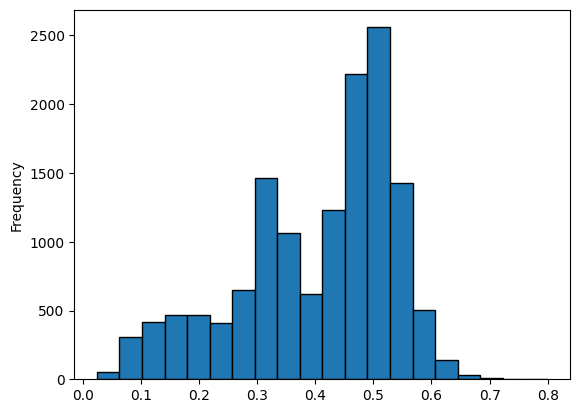

In [ ]:

df['NPHI'].plot.hist(edgecolor='black', bins=20)

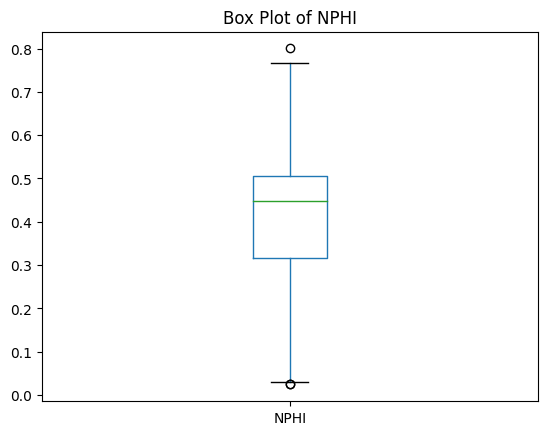

In [ ]:
df.boxplot(column='NPHI', grid=False)
plt.title('Box Plot of NPHI')
plt.show()

In [ ]:
def outliers_nphi(df, col='NPHI'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.index

outliers_nphi(df, 'NPHI')

Index([4239, 18217, 18218], dtype='int64')

In [ ]:
outliers_nphi_index = outliers_nphi(df, 'NPHI')
df.drop(outliers_nphi_index, inplace=True)

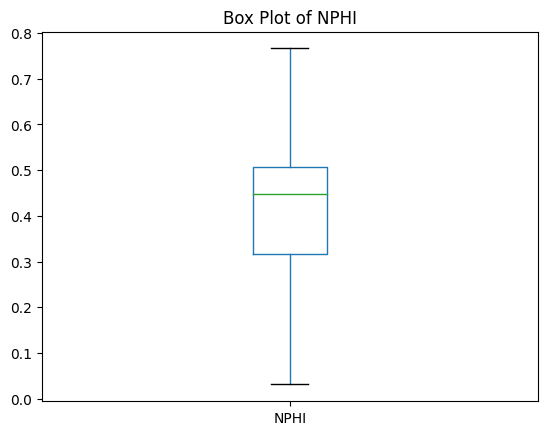

In [ ]:
df.boxplot(column='NPHI', grid=False)
plt.title('Box Plot of NPHI')
plt.show()

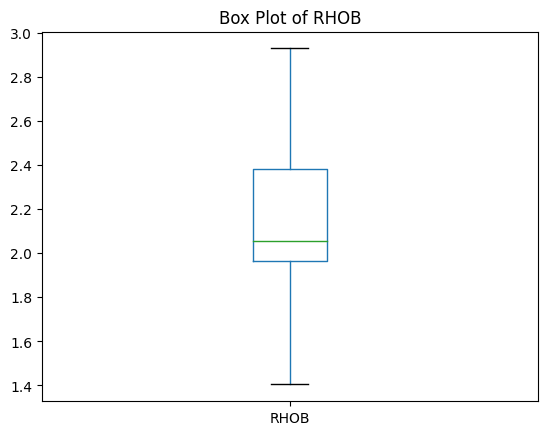

In [ ]:
df.boxplot(column='RHOB', grid=False)
plt.title('Box Plot of RHOB')
plt.show()

In [ ]:
df["NPHI"].isnull().sum()

4238

In [ ]:
df['NPHI'].fillna(df['NPHI'].median(), inplace=True)

In [ ]:
df["NPHI"].isnull().sum()

0

In [ ]:
x = df[['NPHI', 'RHOB']]
x.head()

,NPHI,RHOB
0,0.44853,1.884186
1,0.44853,1.889794
2,0.44853,1.896523
3,0.44853,1.891913
4,0.44853,1.880034


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x = pd.DataFrame(x, columns= [['NPHI', 'RHOB']])
x.head()

,NPHI,RHOB
0,0.285153,-0.760013
1,0.285153,-0.741171
2,0.285153,-0.718561
3,0.285153,-0.734051
4,0.285153,-0.773963


In [55]:
from sklearn.cluster import KMeans

In [ ]:
wcss = []
for i in range(1,16):
  km = KMeans(n_clusters = i, n_init =10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

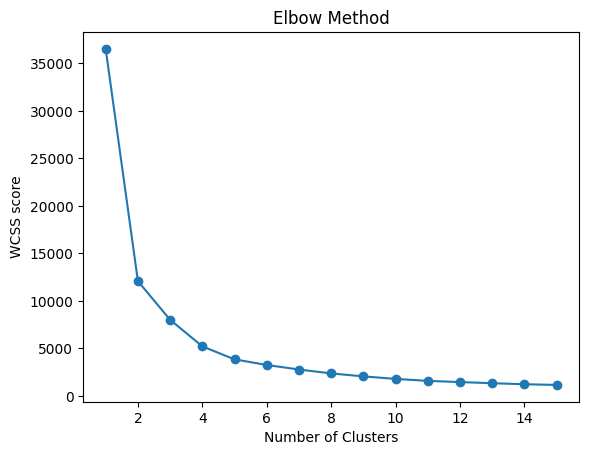

In [ ]:

plt.plot(range(1,16), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')
plt.title('Elbow Method')
plt

In [ ]:
km = KMeans(n_clusters = 4, n_init =10)


In [ ]:
cluster_labels = km.fit_predict(x)

In [ ]:
cluster_labels

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
pd.Series(cluster_labels).value_counts()

,count
1,10449
0,3981
2,1959
3,1878


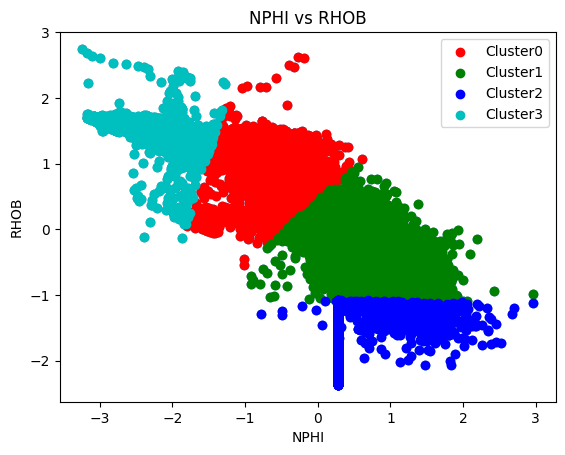

In [ ]:
colors = ['r','g','b','c']
plt.scatter(x['NPHI'], x['RHOB'])
for i in range( max(cluster_labels)+1):
  plt.scatter(x['NPHI'][cluster_labels == i], x['RHOB'][cluster_labels == i], c = colors[i], label = f'Cluster{i}')


plt.xlabel('NPHI')
plt.ylabel('RHOB')
plt.title('NPHI vs RHOB')
plt.legend()

plt.show()



In [ ]:
def predict_cluster(nphi, rhob):
  new_df = [[nphi, rhob]]
  cluster_no = km.predict(new_df)
  return cluster_no[0]

In [ ]:
nphi = 0.2
rhob = -2.9
predict_cluster(nphi, rhob)

2

Aggolomerative

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergings = linkage(x, method = 'ward')

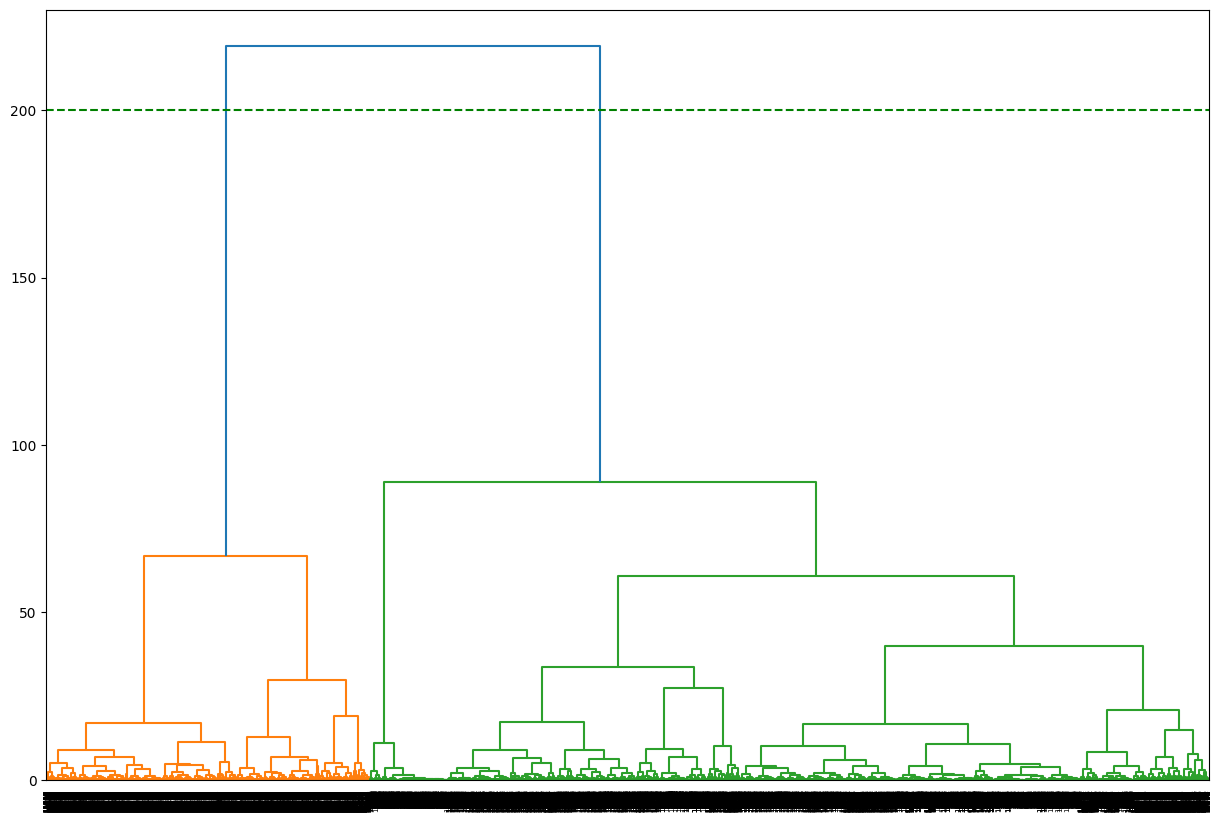

In [ ]:
plt.figure(figsize=(15,10))
dendrogram(mergings, leaf_rotation=90)
plt.axhline(200,c='green',linestyle='--')

plt.show()

In [ ]:
cluster_labels_ag = fcluster(mergings, 200, criterion='distance')

In [ ]:
cluster_labels_ag

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

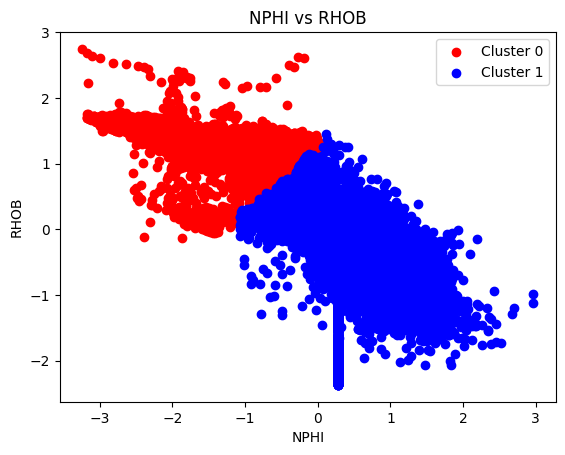

In [ ]:
colours =['r','b']
for i in range(1, max(cluster_labels_ag)+1):
  cluster_data_ag = x[cluster_labels_ag == i]
  plt.scatter(cluster_data_ag['NPHI'], cluster_data_ag['RHOB'],
              c = colours[i-1],
              label = f'Cluster {i-1}')
plt.xlabel('NPHI')

plt.ylabel('RHOB')

plt.title('NPHI vs RHOB')

plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
sil_avg_km = silhouette_score(x,cluster_labels)
print(f"The average silhouette of KMeans score is {sil_avg_km}")


The average silhouette of KMeans score is 0.5596045478426168


In [ ]:
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(x,cluster_labels_ag)
print(f"The average silhouette score is {sil_avg}")


The average silhouette score is 0.6170163669291262


**Question 2**

In [3]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [7]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [8]:
data.nunique()

,0
Channel,2
Region,3
Fresh,433
Milk,421
Grocery,430
Frozen,426
Detergents_Paper,417
Delicassen,403


In [11]:
data['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [12]:
data['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


<Axes: >

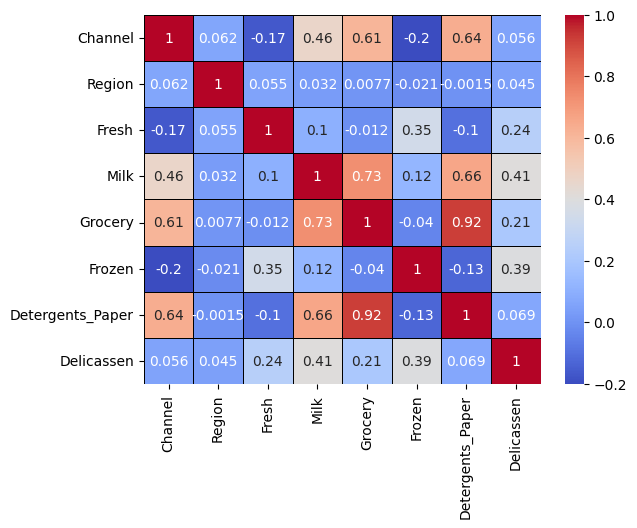

In [8]:
sns.heatmap(data.corr(), annot = True, cmap='coolwarm', linewidths=0.5, linecolor='black')

In [4]:
#  grocery and Detergents_Paper  are highly correlated so we can take one of them.
#drop the column Detergents_Paper

data.drop('Detergents_Paper', axis=1, inplace=True)

In [5]:
data.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Delicassen'],
      dtype='object')

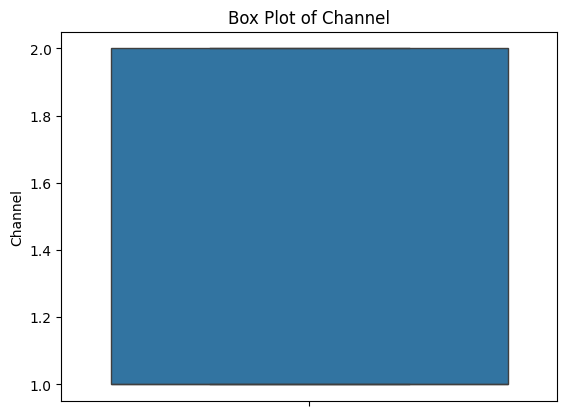

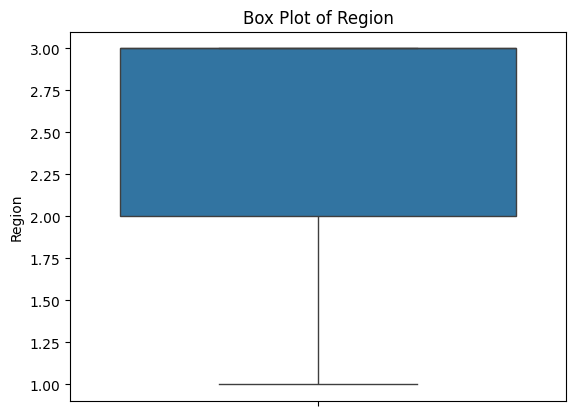

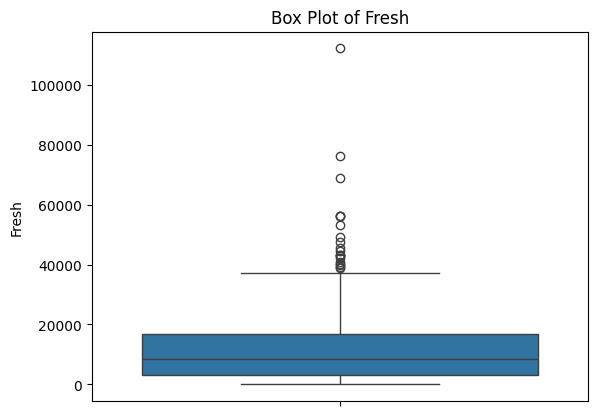

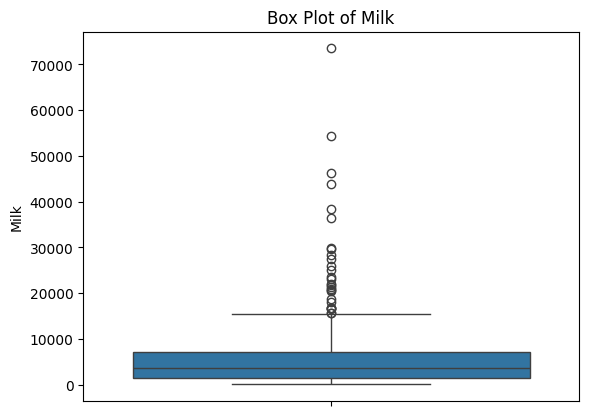

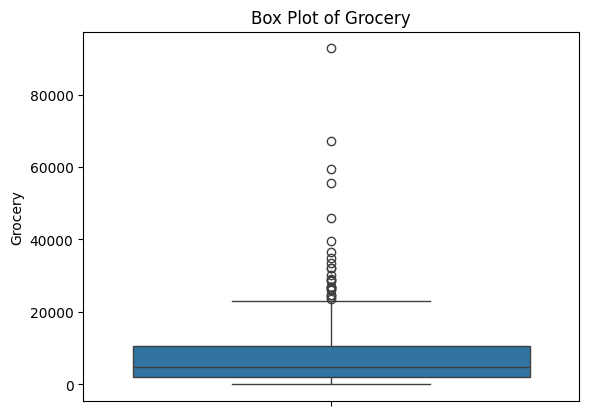

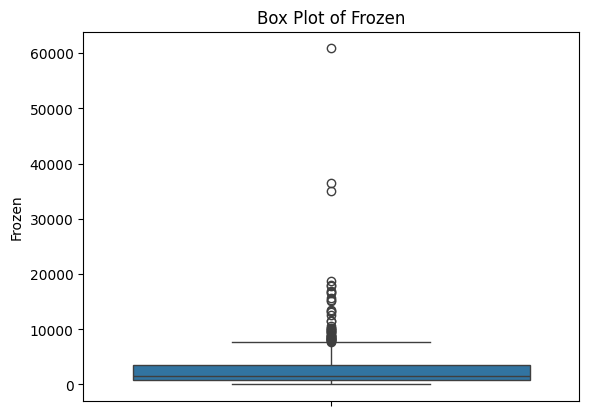

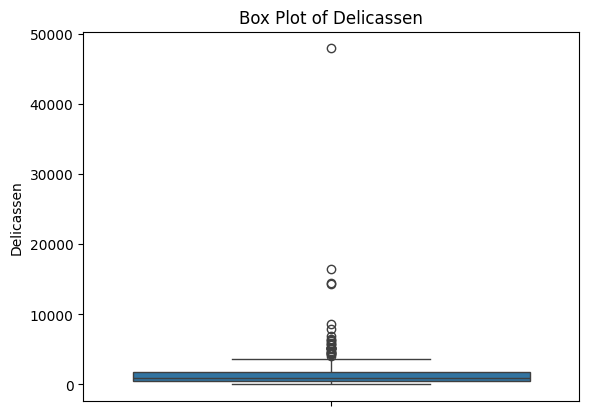

In [16]:
for i in data.columns:
  sns.boxplot(data[i])
  plt.title(f'Box Plot of {i}')
  plt.show()

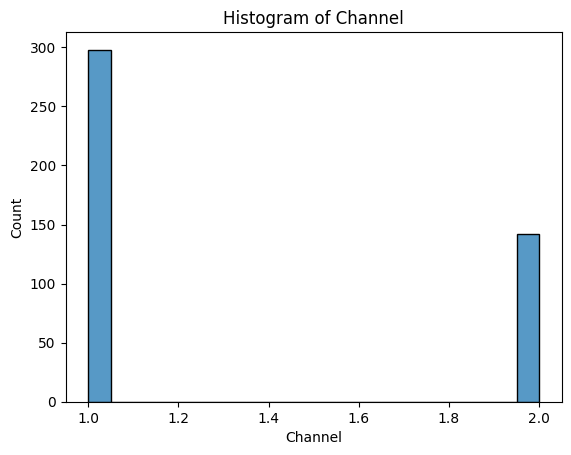

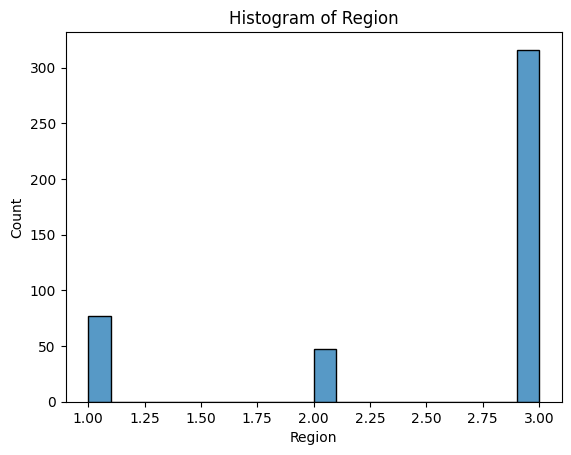

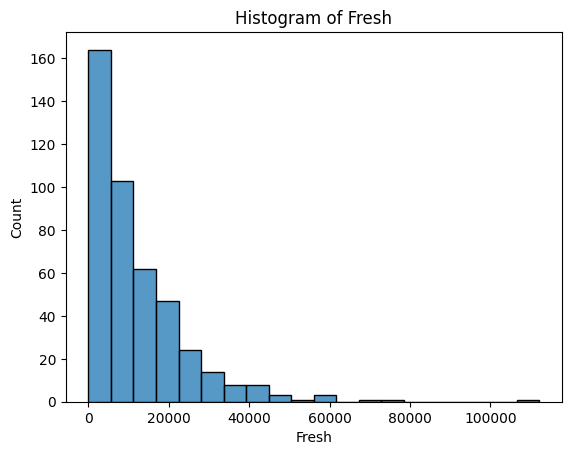

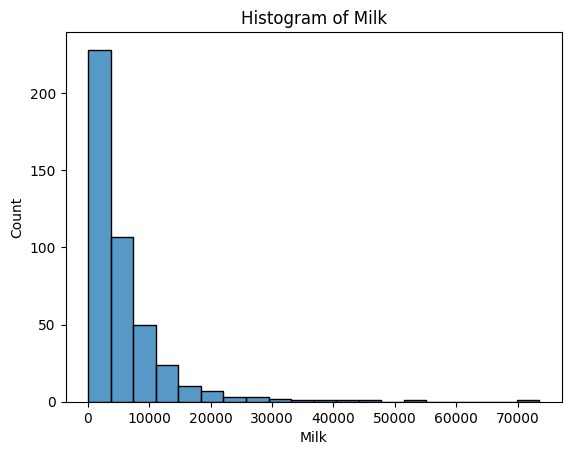

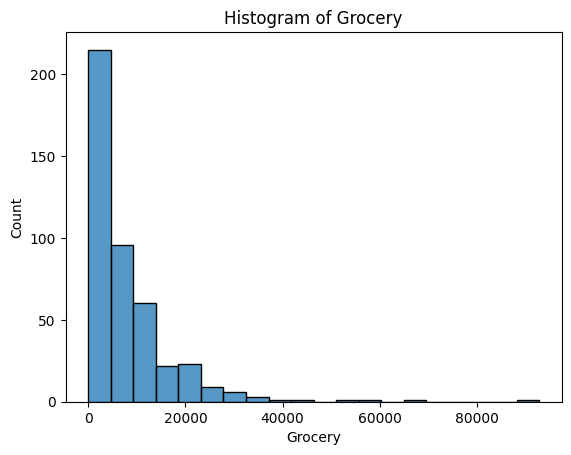

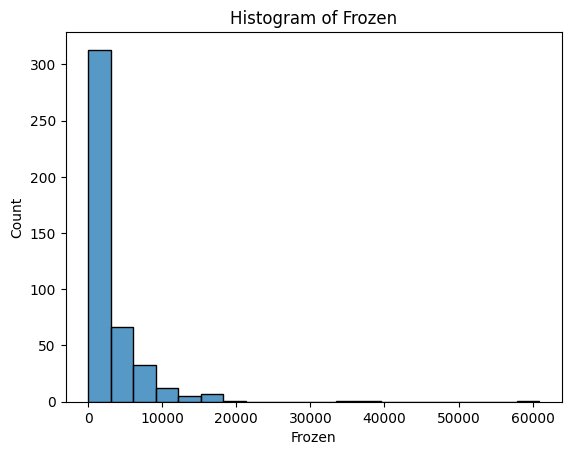

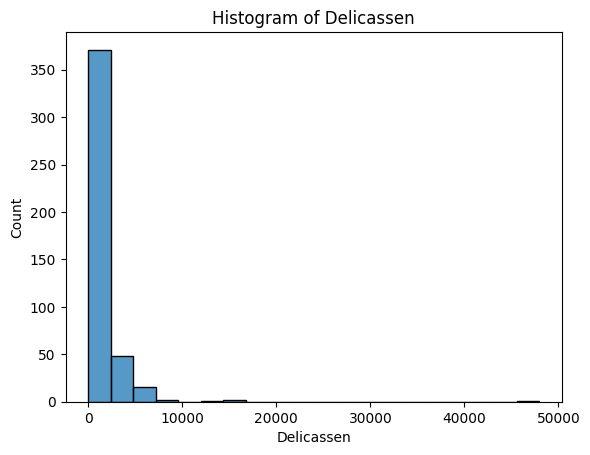

In [17]:
for i in data.columns:
  sns.histplot(data[i], edgecolor='black', bins=20)
  plt.title(f'Histogram of {i}')
  plt.show()

In [6]:

for i in data.columns:
  q1 = data[i].quantile(0.25)
  q3 = data[i].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - (1.5 * iqr)
  upper_bound = q3 + (1.5 * iqr)
  outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
  print(f"Outliers in {i}: {len(outliers)}")







Outliers in Channel: 0
Outliers in Region: 0
Outliers in Fresh: 20
Outliers in Milk: 28
Outliers in Grocery: 24
Outliers in Frozen: 43
Outliers in Delicassen: 27


In [7]:
# All the columns containing outliers are replaced with the median because the histograms indicate that they are all skewed.

def replace_outliers_with_median(df):
    for column in df.columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        median = df[column].median()
        df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    return df

In [8]:
data_cleaned = replace_outliers_with_median(data)

In [9]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Channel     440 non-null    int64  
 1   Region      440 non-null    int64  
 2   Fresh       440 non-null    float64
 3   Milk        440 non-null    float64
 4   Grocery     440 non-null    float64
 5   Frozen      440 non-null    float64
 6   Delicassen  440 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 24.2 KB


In [38]:
data_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.00,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.00,3.00,3.0
Fresh,440.0,10033.079545,8450.546022,3.0,3127.75,8489.50,14792.00,37036.0
Milk,440.0,4281.829545,3402.380107,55.0,1533.00,3623.50,6202.00,15488.0
Grocery,440.0,6218.863636,5339.702492,3.0,2153.00,4754.75,8860.75,23127.0
Frozen,440.0,1896.656818,1674.915834,25.0,742.25,1521.50,2534.00,7683.0
Delicassen,440.0,1084.296591,840.423787,3.0,408.25,964.75,1525.00,3637.0


In [10]:
data_cha_reg = data_cleaned[['Channel', 'Region']]
data_other = data_cleaned[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen']]

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_other = scaler.fit_transform(data_other)

In [12]:

data_other = pd.DataFrame(data_other, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen'])
data_other.head()

,Fresh,Milk,Grocery,Frozen,Delicassen
0,0.312278,1.581331,0.251637,-1.005765,0.302219
1,-0.352577,1.626645,0.627928,-0.080488,0.823978
2,-0.435980,1.331810,0.274698,0.303849,-0.141514
3,0.382886,-0.907994,-0.374579,2.694150,0.838273
4,1.490583,0.331960,0.183578,1.206413,-0.141514


In [13]:
data_after_scale = pd.concat([data_cha_reg, data_other], axis =1)
data_after_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.302219
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.823978
2,2,3,-0.435980,1.331810,0.274698,0.303849,-0.141514
3,1,3,0.382886,-0.907994,-0.374579,2.694150,0.838273
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.141514


In [15]:
x = data_after_scale
x.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,0.312278,1.581331,0.251637,-1.005765,0.302219
1,2,3,-0.352577,1.626645,0.627928,-0.080488,0.823978
2,2,3,-0.435980,1.331810,0.274698,0.303849,-0.141514
3,1,3,0.382886,-0.907994,-0.374579,2.694150,0.838273
4,2,3,1.490583,0.331960,0.183578,1.206413,-0.141514


In [14]:
from sklearn.cluster import KMeans

In [16]:
wcss = []
for i in range(1,16):
  km = KMeans(n_clusters = i, n_init =10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

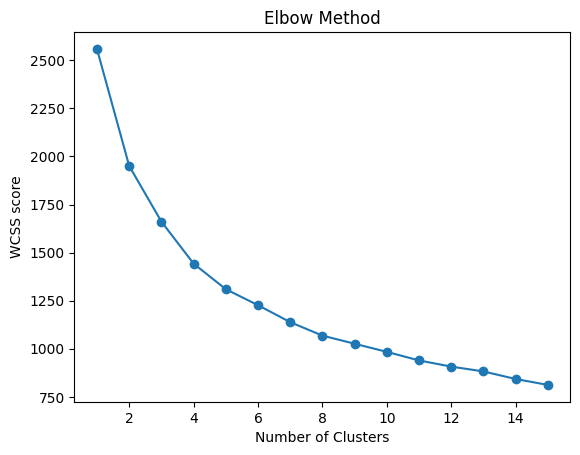

In [18]:
plt.plot(range(1,16), wcss, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')
plt.title('Elbow Method')
plt.show()

In [ ]:
wcss = []
for i in range(1,16):
  km = KMeans(n_clusters = i, n_init =10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

In [19]:
wcss = []
for i in range(1,10):
  km = KMeans(n_clusters = i, n_init =10)
  km.fit(x)
  css = km.inertia_
  wcss.append(css)

Text(0, 0.5, 'WCSS score')

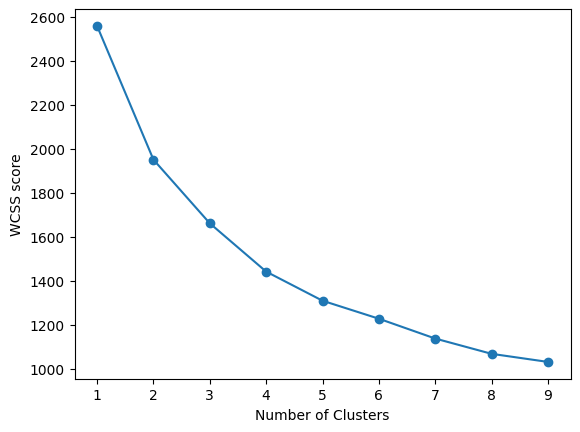

In [20]:
plt.plot(range(1,10), wcss, marker ='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS score')

In [21]:
km = KMeans(n_clusters = 4, n_init =10)

In [22]:
cluster_labels = km.fit_predict(x)

In [23]:
pd.Series(cluster_labels).value_counts()

,count
2,198
1,106
0,76
3,60


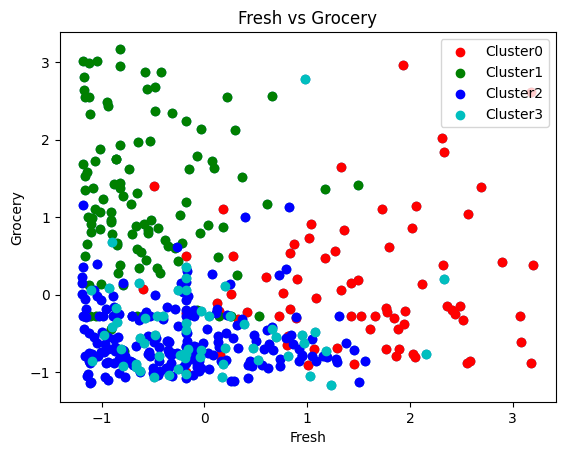

In [24]:
colors = ['r','g','b','c']
plt.scatter(x['Fresh'], x['Grocery'])
for i in range( max(cluster_labels)+1):
  plt.scatter(x['Fresh'][cluster_labels == i], x['Grocery'][cluster_labels == i], c = colors[i], label = f'Cluster{i}')


plt.xlabel('Fresh')
plt.ylabel('Grocery')
plt.title('Fresh vs Grocery')
plt.legend()

plt.show()

In [38]:
x.columns


Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Delicassen'],
      dtype='object')

In [39]:
def predict_cluster(channel, region, fresh, milk, grocery, frozen, delicassen):
  scaler = StandardScaler()
  new_df = [[fresh, milk, grocery, frozen, delicassen]]
  new_cha_reg = [[channel, region]]
  new_cha_reg = pd.DataFrame(new_cha_reg, columns=['Channel', 'Region'])
  new_df = scaler.fit_transform(new_df)
  new_df = pd.DataFrame(new_df, columns = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicassen'])
  new_df = pd.concat([new_cha_reg, new_df], axis =1)
  cluster_no = km.predict(new_df)
  return cluster_no[0]

In [41]:
channel = int(input("Enter the value of channel: "))
region = int(input("Enter the value of region: "))
fresh = int(input("Enter the value of fresh: "))
grocery = int(input("Enter the value of grocery: "))
milk = int(input("Enter the value of milk: "))
frozen = int(input("Enter the value of frozen: "))
delicassen = int(input("Enter the value of delicassen: "))

print(f"Predicted cluster number is-  {predict_cluster(channel, region, fresh, milk, grocery, frozen, delicassen)}")

Enter the value of channel: 33
Enter the value of region: 21
Enter the value of fresh: 2
Enter the value of grocery: 2
Enter the value of milk: 55
Enter the value of frozen: 53
Enter the value of delicassen: 1
Predicted cluster number is-  1


#Aggolomerative#

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [44]:
merging = linkage(x, method = 'ward')


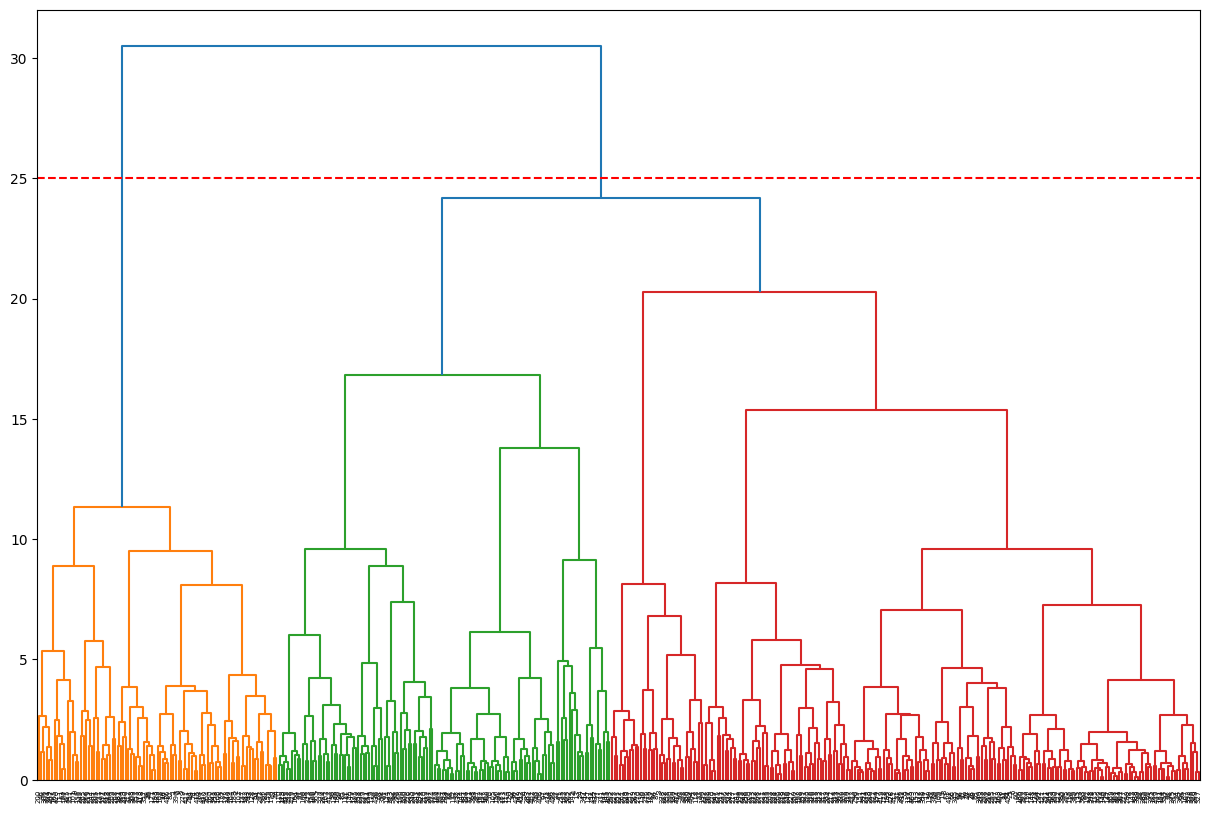

In [47]:
plt.figure(figsize = (15,10))
dendrogram(merging, leaf_rotation = 90)
plt.axhline(25, c = 'red', linestyle = '--')
plt.show()


In [50]:
cluster_labels_aglo = fcluster(merging, 25, criterion = 'distance' )


In [53]:
cluster_labels_aglo

array([1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,

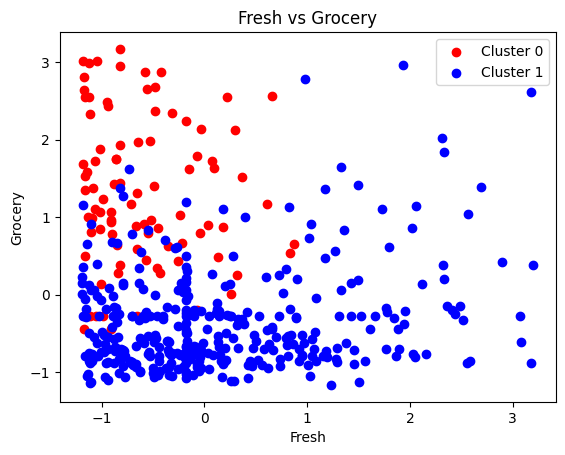

In [56]:
colours =['r','b']
for i in range(1, max(cluster_labels_aglo)+1):
  cluster_data_aglo = x[cluster_labels_aglo == i]
  plt.scatter(cluster_data_aglo['Fresh'], cluster_data_aglo['Grocery'],
              c = colours[i-1],
              label = f'Cluster {i-1}')
plt.xlabel('Fresh')

plt.ylabel('Grocery')

plt.title('Fresh vs Grocery')

plt.legend()

plt.show()

In [57]:
from sklearn.metrics import silhouette_score
sil_avg = silhouette_score(x,cluster_labels_aglo)
print(f"The average silhouette score is {sil_avg}")

The average silhouette score is 0.22570986768825707


In [58]:

sil_avg_km = silhouette_score(x,cluster_labels)
print(f"The average silhouette of KMeans score is {sil_avg_km}")

The average silhouette of KMeans score is 0.24408331972610936
